In [1]:
import numpy as np
import matplotlib.pyplot as plt

from util import *

import mpl_style
plt.style.use(mpl_style.style1)

In [20]:
is_double = True
if is_double:
    dtype = np.float64
else:
    dtype = np.float32
prefix = ''
prefix = f'{prefix}ccf_'

In [12]:
params = read_params(f'{prefix}parameter_info.txt')
params

{'kappa_tot': 0.4,
 'shear': 0.4,
 'mu_ave': 5,
 'smooth_fraction': 0,
 'kappa_star': 0.4,
 'kappa_star_actual': 0.4,
 'theta_star': 1,
 'random_seed': 640821735,
 'mass_function': 'equal',
 'm_lower': 1,
 'm_upper': 1,
 'mean_mass': 1,
 'mean_mass2': 1,
 'mean_mass2_ln_mass': 0,
 'm_lower_actual': 1,
 'm_upper_actual': 1,
 'mean_mass_actual': 1,
 'mean_mass2_actual': 1,
 'mean_mass2_ln_mass_actual': 0,
 'num_stars': 10000,
 'rad': 158.113883,
 'num_roots': 20000,
 'num_phi': 100,
 'num_branches': 1,
 'max_error_1/mu': 1.24775939e-08,
 't_init_roots': 0.35,
 't_ccs': 4.072,
 't_caustics': 0.003}

In [13]:
stars = read_stars(f'{prefix}stars.bin', is_double)
print(stars.shape)

(10000, 3)


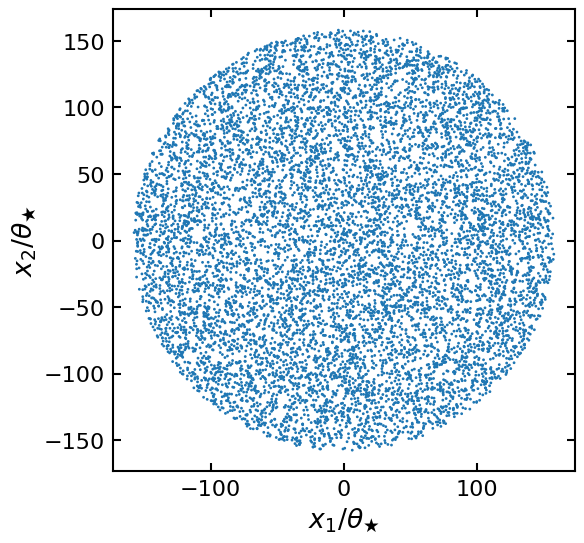

In [14]:
fig, ax = plt.subplots()
ax.scatter(stars[:, 0], stars[:, 1], s=stars[:,2])

ax.set_xlabel('$x_1 / \\theta_★$')
ax.set_ylabel('$x_2 / \\theta_★$')

ax.set_aspect(1)

plt.show()

In [15]:
caustics = read_array(f'{prefix}caustics.bin', dtype, True)

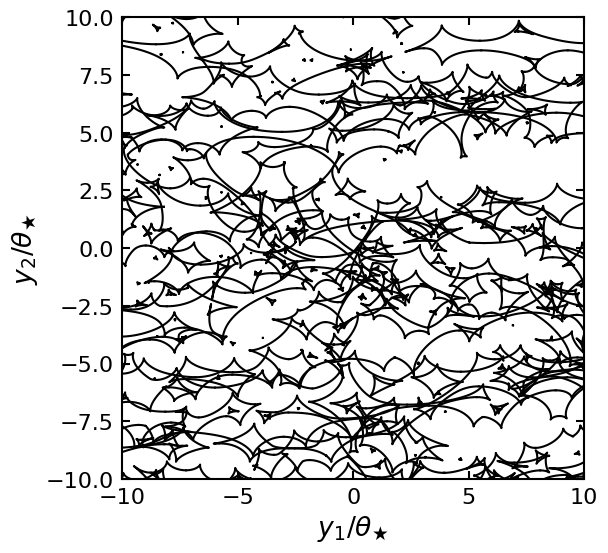

In [16]:
fix, ax = plt.subplots()

for what in caustics:
    ax.plot(*(what.T), color='black')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])

ax.set_xlabel('$y_1 / \\theta_★$')
ax.set_ylabel('$y_2 / \\theta_★$')

ax.set_aspect(1)

plt.show()

In [17]:
ccs = read_array(f'{prefix}ccs.bin', dtype, True)

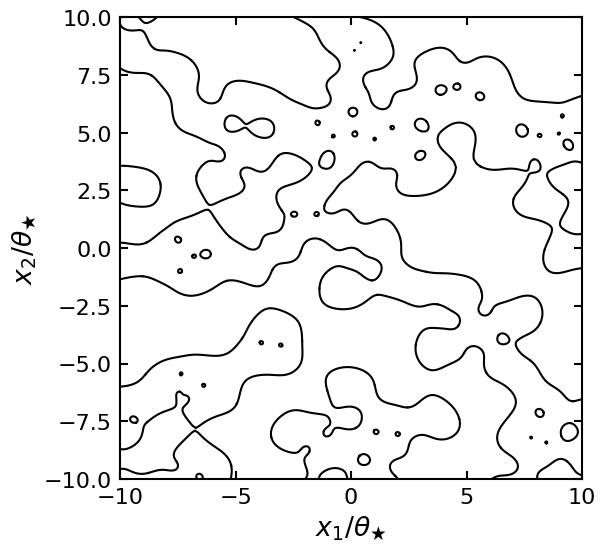

In [18]:
fix, ax = plt.subplots()

for what in ccs:
    ax.plot(*(what.T), color='black')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])

ax.set_xlabel('$x_1 / \\theta_★$')
ax.set_ylabel('$x_2 / \\theta_★$')

ax.set_aspect(1)

plt.show()

In [21]:
mu_length_scales = read_array(f'{prefix}mu_length_scales.bin', dtype)

In [22]:
caustic_lengths = np.linalg.norm(caustics[:,1:] - caustics[:,:-1], axis=2) / 2
caustic_lengths = np.append(caustic_lengths, np.zeros((caustic_lengths.shape[0],1)), axis=1)
caustic_lengths[:,1:] += caustic_lengths[:,:-1]

where = np.logical_and(np.where(np.abs(caustics[:,:,0]) < 10, True, False),
                        np.where(np.abs(caustics[:,:,1]) < 10, True, False))

caustic_length = (2 * np.sum(caustic_lengths[where]) / 
                    (2 * 10 * 2 * 10))
caustic_length

6.091152626200971

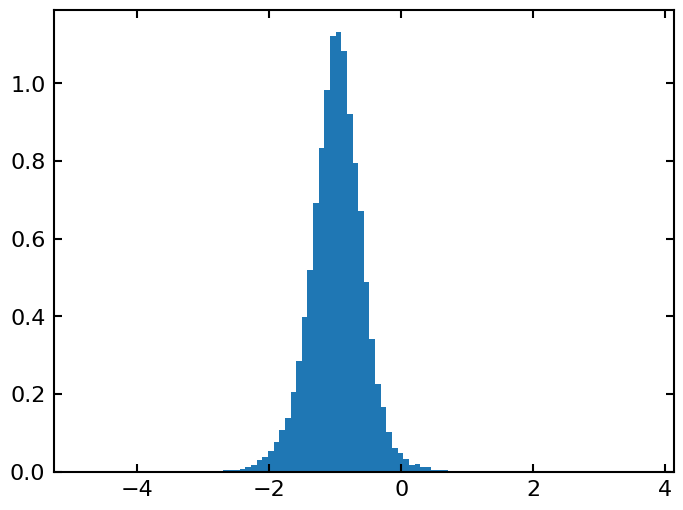

In [23]:
plt.hist(np.log10(mu_length_scales[where].ravel()),weights=caustic_lengths[where].ravel(),density=True, bins=100)
# plt.yscale('log')
plt.show()